In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.N =Param(mutable=True, default=5) 
model.i = RangeSet(1,model.N)

def initval(model,i):
    return random.uniform(0.1,0.9)

def initvalM(model,i):
    return 0.4*random.uniform(0,1)

model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initval,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initval, mutable=True)
model.Mass=Param(model.i,  within=NonNegativeReals, initialize=initvalM, mutable=True)

model.x = Var(bounds=(0,1), within=NonNegativeReals, initialize=0.1)
model.y = Var(bounds=(0,1), within=NonNegativeReals, initialize=0.3)

def rule_C2(model):
    return model.x==sum(1*0.5-np.pi*model.Xloc[i]*model.Mass[i]**2 for i in model.i)/sum(1-np.pi*model.Mass[i]**2 for i in model.i)
model.C2   = Constraint(rule=rule_C2)

def rule_C3(model):
    return model.y==sum(1*0.5-np.pi*model.Yloc[i]*model.Mass[i]**2 for i in model.i)/sum(1-np.pi*model.Mass[i]**2 for i in model.i)
model.C3   = Constraint(rule=rule_C3)
model.obj1 = Objective(expr=model.x , sense=maximize)
#instance.display()

In [3]:
opt = SolverFactory('glpk')
instance = model.create_instance()

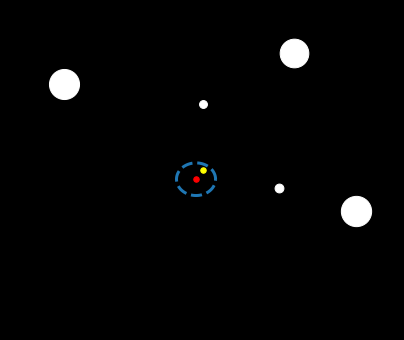

In [4]:
fig = plt.figure(figsize=(7,6),facecolor='black')
#plt.style.use('dark_background')
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),s=3000*value(instance.Mass[i]),color='white')
    
results = opt.solve(instance) # solves and updates instance

plt.scatter(value(instance.x),value(instance.y),color='red',s=30)
plt.scatter(0.5,0.5,color='yellow',s=30)


theta=np.linspace(0,2*np.pi,100)
Xc=value(instance.x)+0.05*np.cos(theta)
Yc=value(instance.y)+0.05*np.sin(theta)
plt.plot(Xc,Yc,'--',lw=3)
plt.axis('off')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()